In [1]:
from unidec_modules.v3_SeqChrom import *

Added in option to load multipe mzml files into engine before metaunidec processing.

In [2]:
folder = "D:\\220121\\PanZ 6M time course repeats"
# folder="C:\\Users\\cm19ljc\\Documents\\PROJECT\\Programming\\Data\\PanZ 6M time course repeats"
plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ sortase time course 1.5 eq gvseyg.xlsx"

In [3]:
# import multiprocessing, time

# def get_files(folder):
#     filenames = os.listdir(folder)
#     engines = []
#     paths = []
#     for dname, dirs, files in os.walk(folder):

#         for fname in files:

#             if fname[-4:] == "mzML":
#                 paths.append(os.path.join(dname, fname))
#     return paths

# def multi_load(path):
#     eng = SeqChom()
#     eng.load_mzml(path, clear_hdf5=True)
#     return eng

# p = multiprocessing.Pool(processes = multiprocessing.cpu_count()-1)

# paths = get_files(folder)

# start = time.time()
# engines = p.map_async(multi_load, paths)
# p.close()
# p.join()
# print("Complete")
# end = time.time()
# print('total time (s)= ' + str(end-start))

# print(paths)
# # engines = pool.map(multi_load, paths)
# print(engines)

In [4]:
def multiprocess_unidec(engine):
    try:
        if eng.ticdat[:, 0].max() > 100: 
            eng.ticdat[:, 0] = eng.tic[:, 0] = eng.ticdat[:, 0]/60 # add in check in code?

        eng.config.chrom_peak_width = 0.6
        eng.get_chrom_peaks(lb = 1, ub = 5.5) 
        eng.add_chrom_peaks2() 
        eng.plot_tic(peak_windows = True)
        eng.update_config(masslb = 10000, massub = 20000, peakthresh = 0.05, minmz="")
        eng.process_data()
        eng.run_unidec()
        eng.pick_peaks()
        eng.integrate_all()
        eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [14000, 17000])
        eng.upload_map(plate_map)
        eng.process_maps(groupby = 'Reaction', variable = 'Species')
        eng.peak_match(silent = True)
        eng.normalise_peaks(silent = True)

        eng.plot_data(plot_type='bar', groupby='Species')
        eng.plot_data()
        return eng
    except:
        return None

In [5]:
# for i, folder in enumerate(folders): 
filenames = os.listdir(folder)
engines = []
for dname, dirs, files in os.walk(folder):

    for fname in files:

        if fname[-4:] == "mzML":
            eng = SeqChrom()

            spectra_path = os.path.join(dname, fname)
            eng.load_mzml(spectra_path, clear_hdf5=True)
            print("loaded {}".format(spectra_path))
            engines.append(eng)



UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
loaded D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
loaded D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\220121\PanZ 6M time course repeats\220121 PanZ 6M B_341584_RB3_01_82406.mzML
found chromatogram
found chromatogram
Converted to gzip file to improve speed: D:\220121\PanZ 6M time course repeats\220121 PanZ 6M B_341584_RB3_01_82406.mzML.gz
loaded D:\220121\PanZ 6M time course repeats\220121 PanZ 6M B_341584_RB3_01_82406.mzML

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bi

In [6]:
engines

1312 2
Noise Level: 0.05076942282233411 Window: 0.6
Bad Peak [0.419317   0.68390531] 0.24191599999999996 [0.419317, 0.661233]
1.20987 0.14964
2.12845 0.20367000000000024
3.06783 0.17037000000000013
4.01553 0.16208
4.94253 0.17454000000000036
Getting scans: [136, 172]
Length merge axis: 38933
Getting scans: [359, 408]
Length merge axis: 39234
Getting scans: [586, 627]
Length merge axis: 38465
Getting scans: [812, 851]
Length merge axis: 38587
Getting scans: [1037, 1079]
Length merge axis: 38269


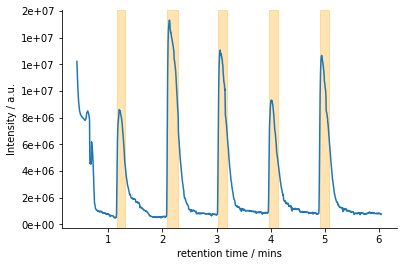

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.6349334000000226
Execution Time: 16.280950500000017
Execution Time: 0.4360767000000578
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220120 PanZ 6M A r2_341424_RE6_01_82312.d_extracts.txt


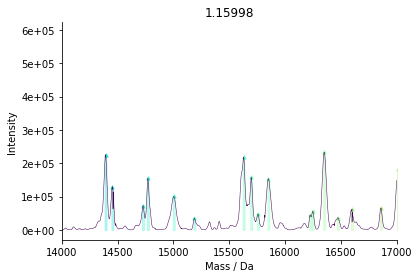

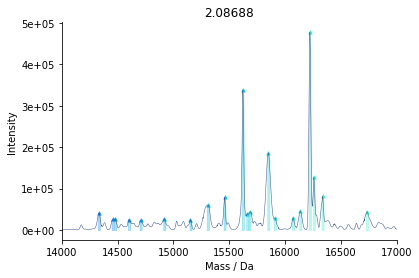

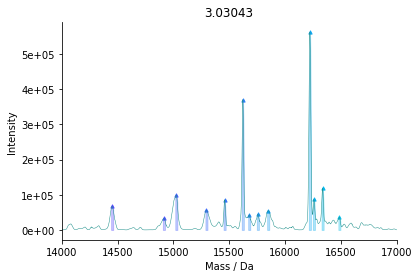

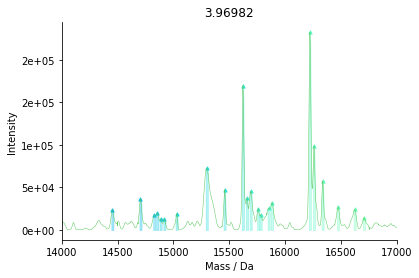

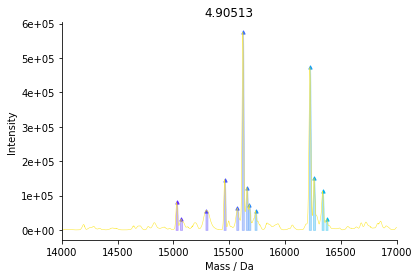

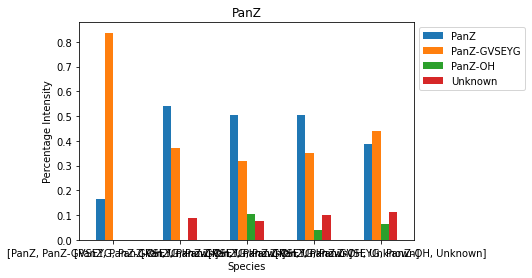

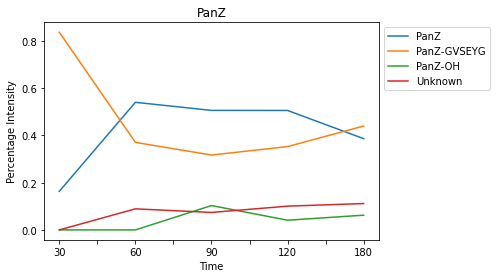

1309 2
Noise Level: 0.05645383593188863 Window: 0.6
Bad Peak [0.419117  0.7216518] 0.246033 [0.419117, 0.66515]
1.20958 0.19985000000000008
2.14085 0.19106999999999985
3.08418 0.19945999999999975
4.01097 0.1828300000000005
4.95023 0.17866999999999944
Getting scans: [138, 186]
Length merge axis: 38755
Getting scans: [362, 408]
Length merge axis: 38562
Getting scans: [587, 635]
Length merge axis: 39265
Getting scans: [812, 856]
Length merge axis: 38921
Getting scans: [1038, 1081]
Length merge axis: 38628


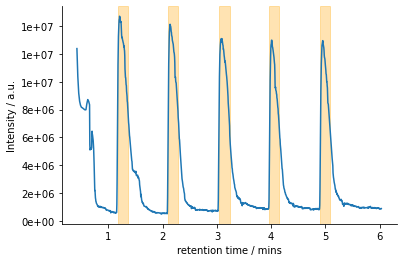

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.16051850000008017
Execution Time: 16.641607199999953
Execution Time: 0.34744389999991654
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220120 PanZ 6M B r2_341369_RB6_01_82288.d_extracts.txt


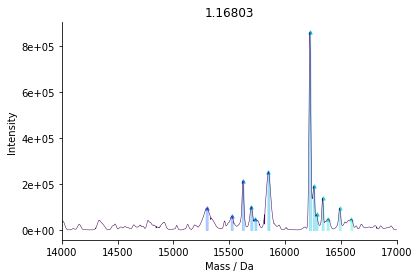

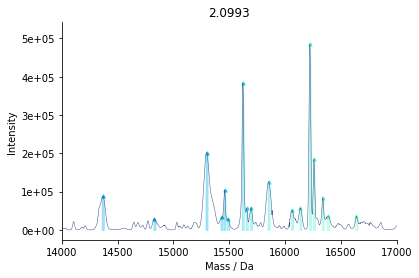

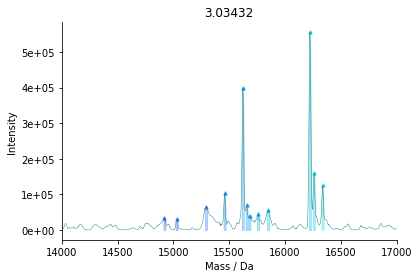

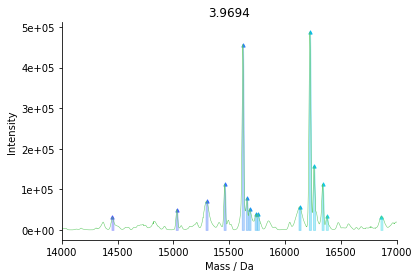

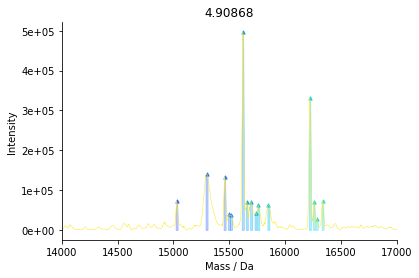

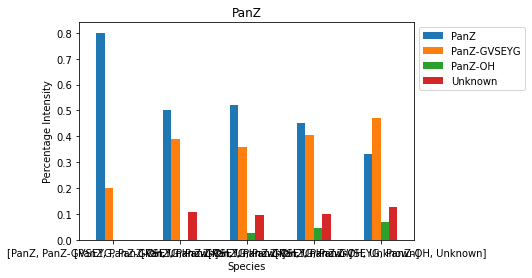

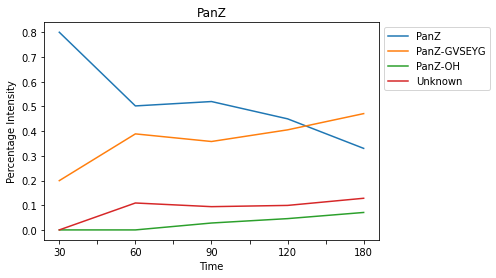

1340 2
Noise Level: 0.09053500318290196 Window: 0.6
0.4686166666666667 0.34583333333333327
1.2049166666666666 0.20361666666666678
2.1316333333333333 0.19153333333333356
3.0797000000000003 0.20779999999999976
4.0106166666666665 0.1911333333333327
4.93745 0.1870166666666666
Scan Range: [160, 209]
Error in Memory Safe mzML, trying memory heavy method


C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Getting scans: [160, 209]
Length merge axis: 386659
Getting scans: [385, 431]
Length merge axis: 386659
Getting scans: [610, 660]
Length merge axis: 386659
Getting scans: [835, 881]
Length merge axis: 386659
Getting scans: [1060, 1105]
Length merge axis: 386659


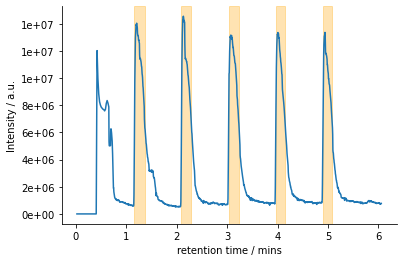

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.4950050999998439
Execution Time: 892.1189590000001
Execution Time: 1.09388940000008
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220121 PanZ 6M B_341584_RB3_01_82406_extracts.txt


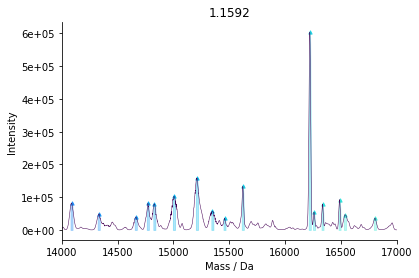

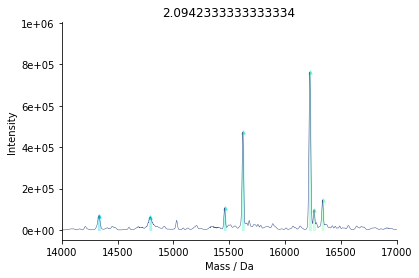

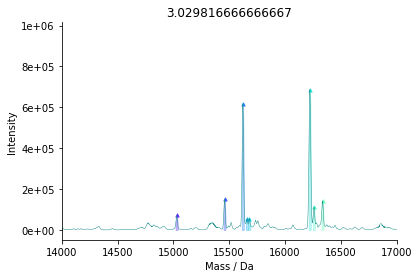

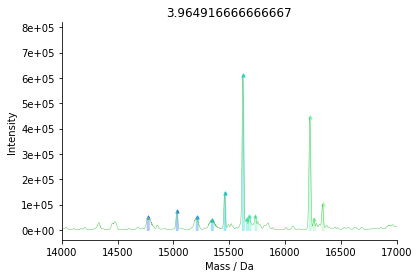

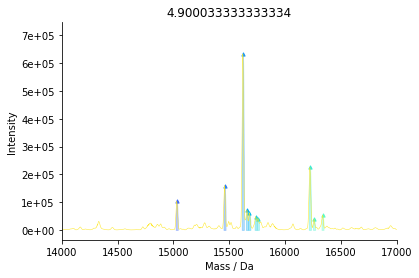

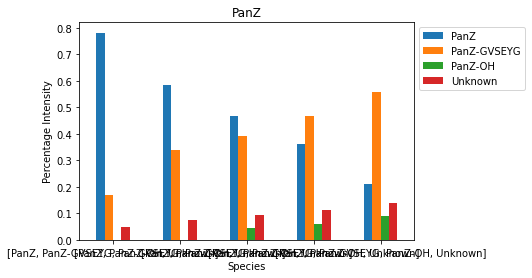

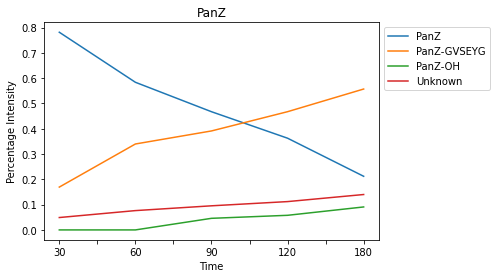

1314 2
Noise Level: 0.05218106333593649 Window: 0.6
Bad Peak [0.419267   0.68896193] 0.24179999999999996 [0.419267, 0.661067]
1.19683 0.21599999999999997
2.12727 0.2118000000000002
3.06588 0.2035199999999997
3.99212 0.1869900000000002
4.93535 0.19527000000000072
Getting scans: [135, 187]
Length merge axis: 39351
Getting scans: [360, 411]
Length merge axis: 38793
Getting scans: [585, 634]
Length merge axis: 38455
Getting scans: [810, 855]
Length merge axis: 38804
Getting scans: [1035, 1082]
Length merge axis: 39307


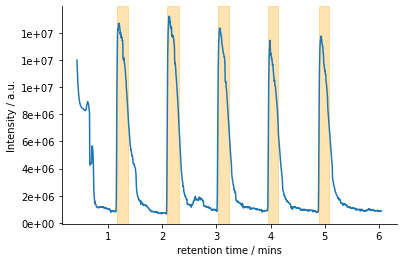

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.20071720000032656
Execution Time: 16.64934979999998
Execution Time: 0.19917820000000575
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220125 PanZ labelling 37_341752_BB6_01_82457.d_extracts.txt


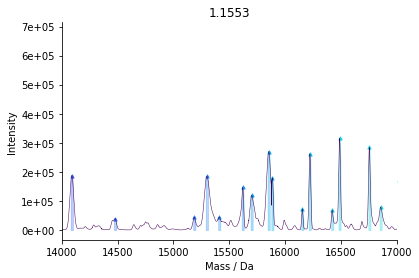

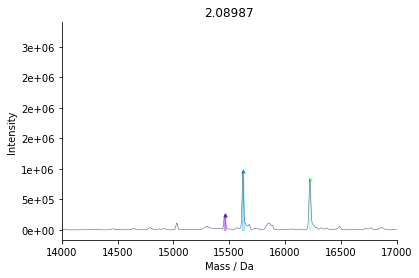

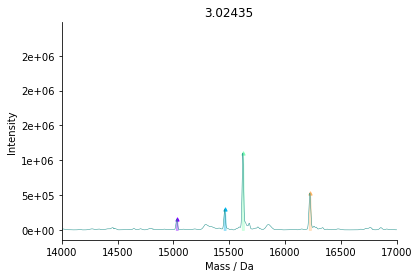

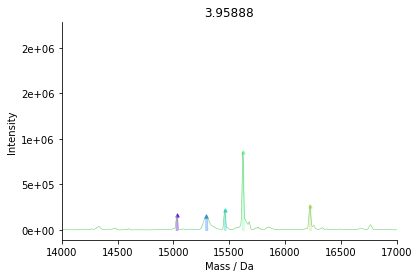

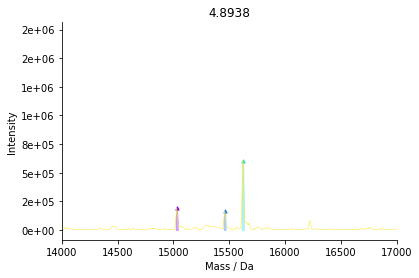

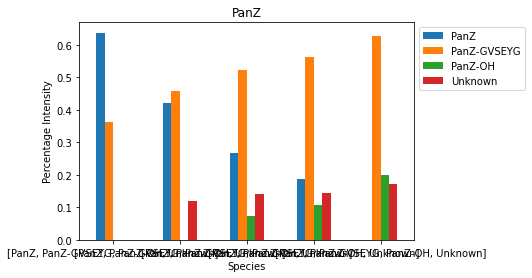

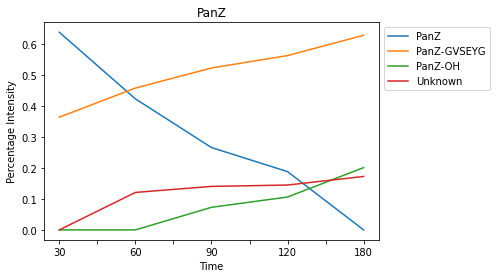

1308 2
Noise Level: 0.05421592980501297 Window: 0.6
Bad Peak [0.419317   0.85315743] 0.23771599999999998 [0.419317, 0.657033]
1.14337 0.34495999999999993
2.01622 0.16625999999999985
2.9349 0.16211999999999982
3.89103 0.17041999999999957
4.93447 0.23278
Getting scans: [110, 193]
Length merge axis: 38528
Getting scans: [330, 370]
Length merge axis: 37959
Getting scans: [554, 593]
Length merge axis: 37652
Getting scans: [780, 821]
Length merge axis: 37992
Getting scans: [1019, 1075]
Length merge axis: 37698


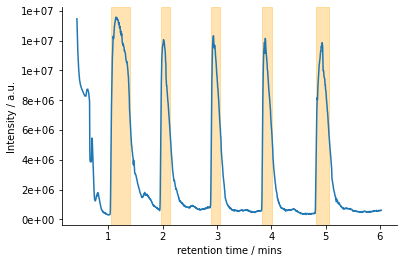

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.1960785000001124
Execution Time: 15.985440600000402
Execution Time: 0.2836357000001044
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220721 C_340683_BE4_01_82112.d_extracts.txt


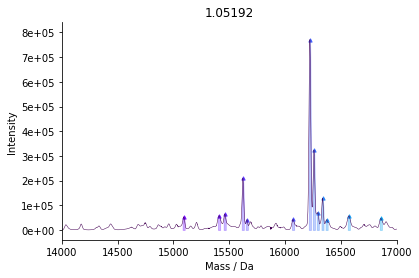

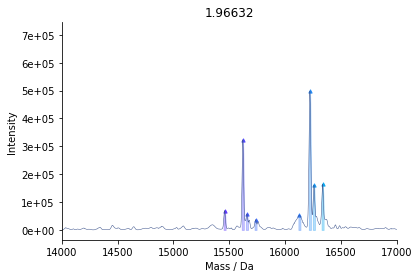

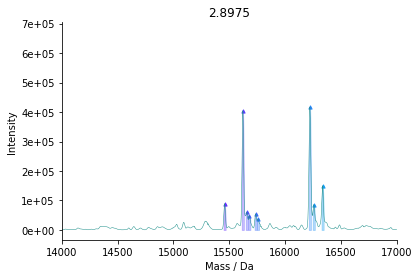

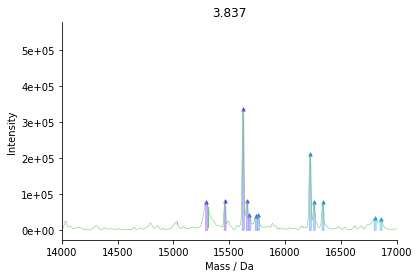

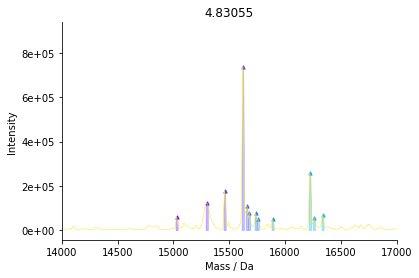

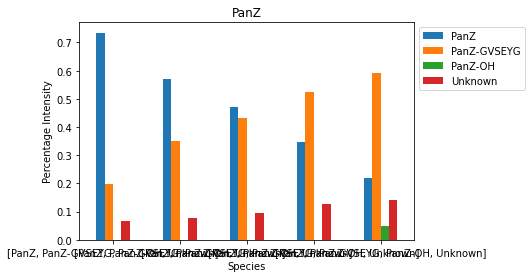

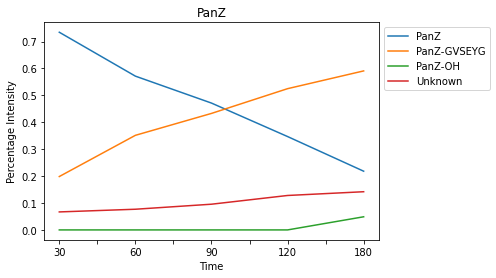

In [7]:
for eng in engines:
    try:
        if eng.ticdat[:, 0].max() > 100: 
            eng.ticdat[:, 0] = eng.tic[:, 0] = eng.ticdat[:, 0]/60 # add in check in code?

        eng.config.chrom_peak_width = 0.6
        eng.get_chrom_peaks(lb = 1, ub = 5.5) 
        eng.add_chrom_peaks2() 
        eng.plot_tic(peak_windows = True)
        eng.update_config(masslb = 10000, massub = 20000, peakthresh = 0.05, minmz="")
        eng.process_data()
        eng.run_unidec()
        eng.pick_peaks()
        eng.integrate_all()
        eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [14000, 17000])
        eng.upload_map(plate_map)
        eng.process_maps(groupby = 'Reaction', variable = 'Species')
        eng.peak_match(silent = True)
        eng.normalise_peaks(silent = True)

        eng.plot_data(plot_type='bar', groupby='Species')
        eng.plot_data()
    except:
        print(eng.filename)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

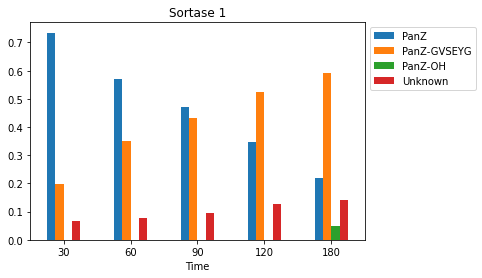

In [8]:
df = eng.data_df['PanZ']

df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Sortase 1')
plt.show()

In [9]:
dfs = [list(eng.data_df.values())[0] for eng in engines]

D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML


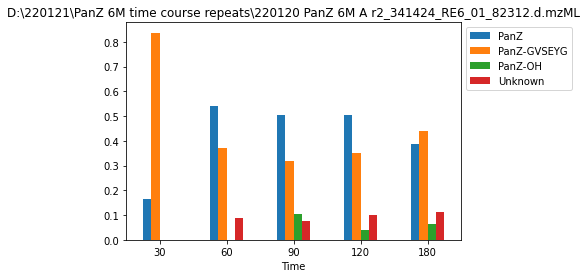

D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML


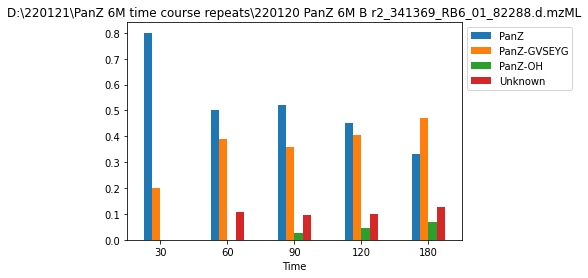

D:\220121\PanZ 6M time course repeats\220121 PanZ 6M B_341584_RB3_01_82406.mzML


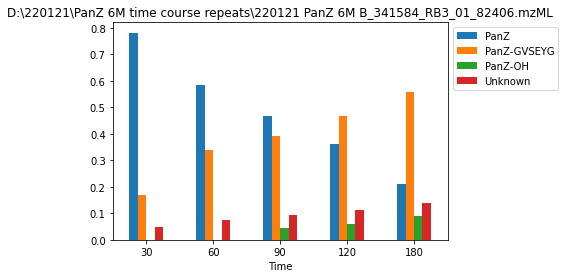

D:\220121\PanZ 6M time course repeats\220125 PanZ labelling 37_341752_BB6_01_82457.d.mzML


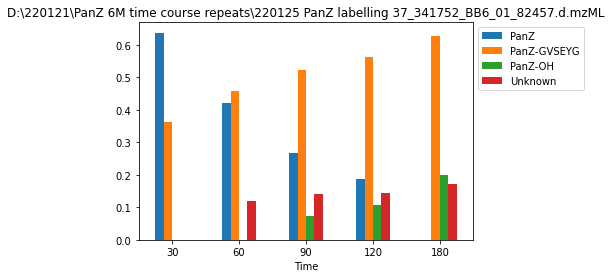

D:\220121\PanZ 6M time course repeats\220721 C_340683_BE4_01_82112.d.mzML


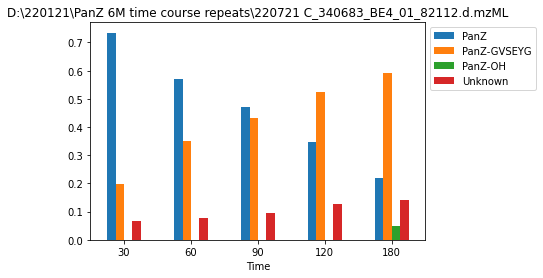

In [10]:
for eng in engines:
    df = eng.data_df['PanZ']
    df.plot.bar(rot = 0)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.title(eng.path)
    print(eng.path)
    plt.show()

In [11]:
import pandas as pd

In [12]:
df_concat = pd.concat(dfs)
df_concat=df_concat.groupby(df_concat.index)

In [13]:
std = df_concat.std()
means = df_concat.mean()
means.index = [float(i) for i in means.index]
means = means.sort_index()

In [14]:
colors=['blue', 'green', 'red', 'yellow']

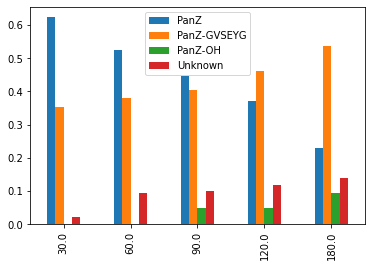

In [15]:
means.plot.bar()
plt.show()

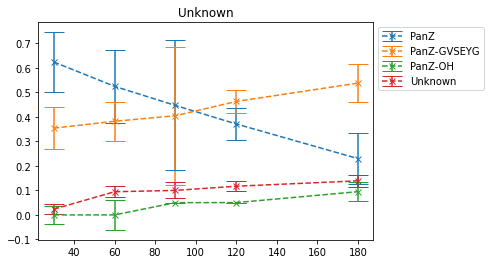

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for species in means.columns:
    ax.errorbar(means.index, means[species], yerr=std[species], capsize = 10, marker = "x", ls = "--", label=species)
    plt.title(species)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

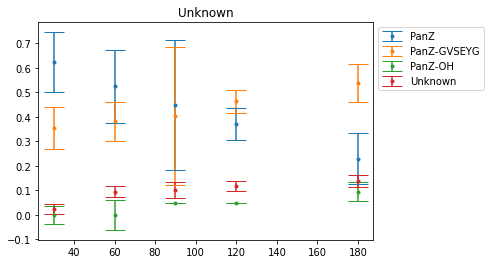

In [17]:
fig, ax = plt.subplots()

for species in means.columns:
    ax.errorbar(means.index, means[species], yerr=std[species], capsize = 10, fmt='.', label = species)
#     ax.bar(x=means.index, height=means[species], width = 5)
    plt.title(species)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [18]:
def colorcode(lst, cmap = 'rainbow'):
    c = []
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.linspace(0, 1, len(lst)))
    for i, s in enumerate(lst):
        c.append(colors[i])
    return c

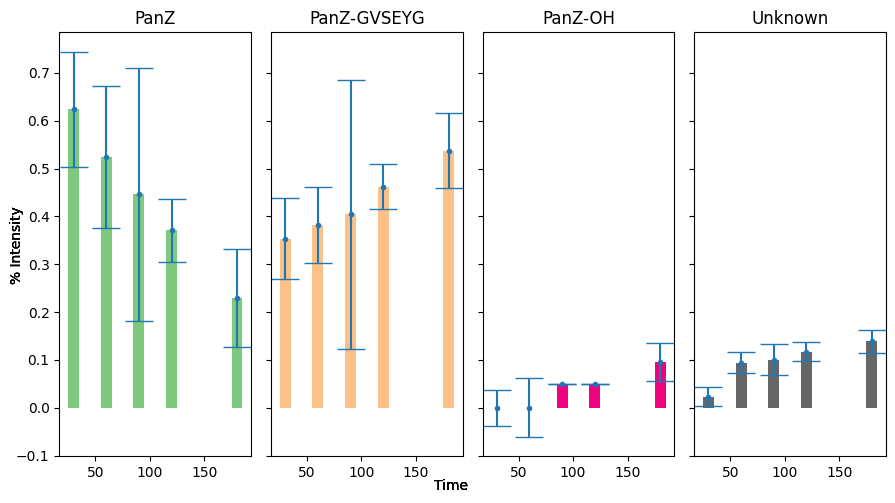

In [19]:
delete = ["D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML",

"D:\220121\PanZ 6M time course repeats\220125 PanZ labelling 37_341752_BB6_01_82457.d.mzML"
]

dfs = [list(eng.data_df.values())[0] for eng in engines if eng.path not in delete]

df_concat = pd.concat(dfs)
df_concat=df_concat.groupby(df_concat.index)
std = df_concat.std()
means = df_concat.mean()
means.index = [float(i) for i in means.index]
means = means.sort_index()
fig, ax = plt.subplots(1, (len(means.columns)), sharey=True, dpi=100, figsize = (9, 5))
colors = colorcode(list(means.columns), cmap='Accent')
for i, species in enumerate(means.columns):
    
    ax[i].errorbar(means.index, means[species], yerr=std[species], capsize = 10, fmt='.')
    ax[i].bar(x=means.index, height=means[species], width = 10, color=colors[i])
    ax[i].set_title(species)
#     ax[i].set_ylabel("% Intensity")
#     ax[i].set_xlabel("Time")
    fig.text(0.5, 0.01, 'Time', ha='center')
    fig.text(0.01, 0.5, '% Intensity', va='center', rotation='vertical')
    plt.tight_layout()
#     ax.set_ylim(bottom=0)
plt.show()